# K-Nearest Neighbors (KNN) on Diabetes Dataset

**Problem Statement:** Implement K-Nearest Neighbors algorithm on the diabetes dataset.

**Objectives:**
1. Pre-process the dataset.
2. Implement the KNN algorithm.
3. Compute and analyze the model's performance using confusion matrix, accuracy, error rate, precision, and recall.

## Imports
Import necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Loading and Initial Exploration

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Check for missing values
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

### 1.2. Define Input (X) and Output (y) Features
Separate the dataset into features (X) and the target variable (y).

In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### 1.4. Train-Test Split
Split the data into training and testing sets (80% train, 20% test).

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.5. Feature Scaling
KNN calculates distances between data points. If features are on different scales (e.g., 'Age' from 21-81 vs. 'Glucose' from 0-199), the features with larger ranges will dominate the distance calculation. StandardScaler standardizes the features by removing the mean and scaling to unit variance.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

### 2. Implement K-Nearest Neighbors (KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
#Make Predictions
y_pred = knn.predict(X_test_scaled)

### 3. Model Evaluation

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [18]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n1. Confusion Matrix:")
print(cm)


1. Confusion Matrix:
[[79 20]
 [27 28]]


In [19]:
# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n2. Accuracy: {accuracy:.4f}")


2. Accuracy: 0.6948


In [20]:
# 3. Error Rate
error_rate = 1 - accuracy
print(f"\n3. Error Rate: {error_rate:.4f}")


3. Error Rate: 0.3052


In [21]:
# 4. Precision
precision = precision_score(y_test, y_pred)
print(f"\n4. Precision: {precision:.4f}")


4. Precision: 0.5833


In [22]:
# 5. Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f"\n5. Recall: {recall:.4f}")


5. Recall: 0.5091


Text(0.5, 14.722222222222216, 'Predicted Label')

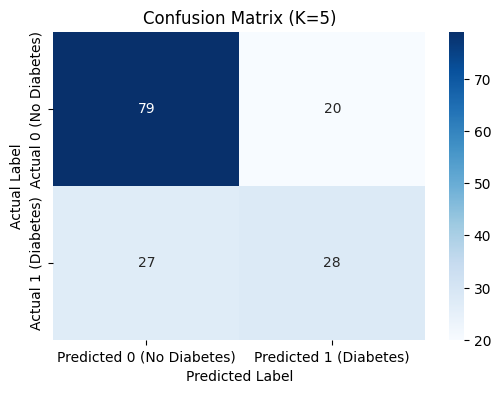

In [23]:
#Visualize the Confusion Matrix (optional)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0 (No Diabetes)', 'Predicted 1 (Diabetes)'],
            yticklabels=['Actual 0 (No Diabetes)', 'Actual 1 (Diabetes)'])

plt.title('Confusion Matrix (K=5)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Summary of Results

The KNN model was implemented on the scaled diabetes dataset. The performance metrics are as follows:
- **Confusion Matrix:** Shows the number of true positives, true negatives, false positives, and false negatives.
- **Accuracy:** Represents the proportion of correctly classified instances.
- **Error Rate:** The proportion of incorrectly classified instances (1 - Accuracy).
- **Precision:** Indicates the proportion of positive identifications that were actually correct.
- **Recall (Sensitivity):** Indicates the proportion of actual positives that were correctly identified.

# Notes

## 1. K-Nearest Neighbors (KNN) Algorithm

### Introduction
The **K-Nearest Neighbors (KNN)** algorithm is a **supervised machine learning** algorithm used for both classification and regression. It is a simple yet powerful algorithm that works by finding the 'K' most similar data points (neighbors) in the training data to a new, unseen data point.

* **For Classification:** The new data point is assigned the class that is most common among its 'K' neighbors (this is called "plurality voting").
* **For Regression:** The new data point's value is the average (or median) of the values of its 'K' neighbors.

It is known as a **non-parametric** algorithm because it makes no assumptions about the underlying data distribution. It is also a **lazy learning** algorithm because it doesn't build a complex internal model during training. It simply stores the entire training dataset and performs calculations only when a prediction is required.

### Why Used in this Notebook
We used KNN to **classify** patients as either having diabetes (Outcome=1) or not having diabetes (Outcome=0) based on their health metrics (features like Glucose, BMI, Age, etc.).

### Key Properties & Concepts
* **Choosing 'K':** The value of 'K' is a critical hyperparameter.
    * A **small 'K'** (e.g., K=1) makes the model sensitive to noise and outliers.
    * A **large 'K'** makes the model computationally expensive and can "over-smooth" the decision boundaries, potentially ignoring local patterns.
    * A common practice is to choose an **odd number for 'K'** (like 3, 5, 7) in binary classification to avoid ties.
* **Distance Metric:** KNN relies on a distance metric to find the "closest" neighbors. The most common metric is:
    * **Euclidean Distance:** The straight-line distance between two points. This is what `sklearn`'s `KNeighborsClassifier` uses by default.
    * **Manhattan Distance:** The sum of the absolute differences of their Cartesian coordinates.
* **Curse of Dimensionality:** KNN's performance can degrade as the number of features (dimensions) increases. In high-dimensional space, the distance between all points can become almost equal, making it difficult to find meaningful "nearest" neighbors.

### Formula
The **Euclidean Distance** $d(p, q)$ between two points $p = (p_1, p_2, ..., p_n)$ and $q = (q_1, q_2, ..., q_n)$ in $n$-dimensional space is:

$$
d(p, q) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_n - p_n)^2} = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}
$$

---

## 2. Feature Scaling (using StandardScaler)

### Introduction
**Feature Scaling** is a pre-processing technique used to normalize or standardize the range of independent variables (features) of a dataset. When features have different units and scales (e.g., 'Age' 20-80 vs. 'Insulin' 0-846), models that are sensitive to distance can be biased.

**StandardScaler** is a specific type of scaling that standardizes features by removing the mean and scaling them to **unit variance**.

### Why Used in this Notebook
The KNN algorithm is **highly sensitive to the scale of the data** because it is based on calculating distances (like Euclidean distance). A feature with a large range (e.g., 'Glucose') would completely dominate a feature with a small range (e.g., 'Pedigree'), effectively making the small-scale feature irrelevant.

We used `StandardScaler` to transform all features so they have a **mean ($\mu$) of 0** and a **standard deviation ($\sigma$) of 1**. This ensures that all features contribute equally to the distance calculations.

### Key Properties & Concepts
* **Standardization (Z-score Normalization):** This is the method `StandardScaler` uses. It assumes the data is (roughly) Gaussian (bell-shaped).
* **Normalization (Min-Max Scaling):** Another common type, which scales data to a fixed range, usually $[0, 1]$.
* **Data Leakage:** This is a critical error. You must **NEVER** fit the scaler to your test data.
    1.  You call `fit_transform()` on the **training data (X_train)**. This "learns" the $\mu$ and $\sigma$ of *only* the training data.
    2.  You then call *only* `transform()` on the **test data (X_test)**, using the $\mu$ and $\sigma$ learned from the training data. This simulates how the model would handle new, unseen data in the real world.

### Formula
The formula for **Standardization (Z-score)** applied to a value $x$ is:

$$
z = \frac{(x - \mu)}{\sigma}
$$

Where:
* $x$ is the original feature value.
* $\mu$ is the mean of that feature's column (in the training set).
* $\sigma$ is the standard deviation of that feature's column (in the training set).

---
## 3. Train-Test Split

### Introduction
**Train-Test Split** is a validation technique where we divide our source dataset into two separate subsets:
1.  **Training Set:** A majority of the data (e.g., 80%) used to "teach" or "fit" the machine learning model.
2.  **Test Set:** A smaller, held-back portion of the data (e.g., 20%) used to evaluate the model's performance on unseen data.

### Why Used in this Notebook
The primary goal is to **prevent overfitting**. Overfitting occurs when a model "memorizes" the training data, including its noise, and performs very well on it but fails to generalize to new, unseen data.

By testing the model on the `X_test` data (which it has *never* seen during training), we get an unbiased estimate of how it will perform in the real world.

### Key Properties & Concepts
* **`test_size=0.2`:** This parameter specified that we wanted to allocate 20% of the data to the test set and 80% to the training set.
* **`random_state=42`:** This parameter sets a "seed" for the random number generator that shuffles the data before splitting. Using a specific number (like 42) ensures that the split is **reproducible**. Every time we run the code, the *exact same rows* will end up in the training and test sets, which is vital for debugging and comparing models.

---
## 4. Confusion Matrix

### Introduction
A **Confusion Matrix** is a performance measurement table for a classification model. It provides a detailed breakdown of how many predictions were correct and what *types* of errors were made. It is far more informative than a single accuracy score.

### Why Used in this Notebook
To understand *where* our KNN model was succeeding and where it was failing. For example, was it better at identifying non-diabetics (Outcome=0) or diabetics (Outcome=1)? How many diabetics did it *miss*?

### Key Properties & Concepts
The matrix has four quadrants, based on the *actual* (true) label vs. the *predicted* label. In our diabetes context (where 1=Diabetes, 0=No Diabetes):

* **True Negative (TN):**
    * Correct. The model correctly identified a healthy person.
* **False Positive (FP) - Type I Error:**
    * Incorrect. The model wrongly flagged a healthy person as diabetic. (A "false alarm").
* **False Negative (FN) - Type II Error:**
    * Incorrect. The model *missed* a diabetic person, telling them they were healthy. (This is often the most dangerous error in medical testing).
* **True Positive (TP):**
    * Correct. The model correctly identified a diabetic person.

A good model has high values on the main diagonal (TN and TP) and low values on the off-diagonal (FP and FN).

---
## 5. Model Evaluation Metrics

#### 1. Accuracy
* **What it is:** The percentage of all predictions that were correct.
* **Formula:** $\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
* **When to use:** A good general measure, but it can be **very misleading** if the dataset is **imbalanced** (e.g., 95% non-diabetic, 5% diabetic). A model that just "guesses 0" every time would be 95% accurate but useless.

#### 2. Precision
* **What it is:** Of all the times the model predicted "Positive" (Diabetes), what percentage was *actually* correct.
* **Formula:** $\text{Precision} = \frac{TP}{TP + FP}$
* **When to use:** When the cost of a **False Positive** is high. For example, a spam filter. You want to be very *precise* that what you mark as spam *is* spam, otherwise, you might block an important email.

#### 3. Recall (also called Sensitivity or True Positive Rate)
* **What it is:** Of all the *actual Positive cases* (real diabetics), what percentage did the model correctly find.
* **Formula:** $\text{Recall} = \frac{TP}{TP + FN}$
* **When to use:** When the cost of a **False Negative** is high. This is *critical* for medical diagnostics. You want to "recall" or "find" all the sick patients, even if you get a few false positives. **High recall is the priority in this diabetes case.**

#### 4. Error Rate
* **What it is:** The percentage of all predictions that were incorrect.
* **Formula:** $\text{Error Rate} = \frac{FP + FN}{TP + TN + FP + FN} = 1 - \text{Accuracy}$
